In [1]:
from FFP_SA import FFP

reading parameters...
NARROWBAND SIMULATION
ocean-atmosphere


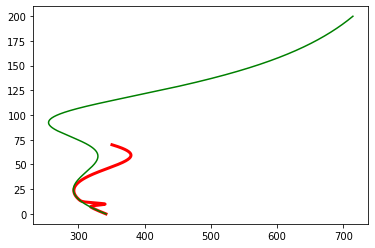

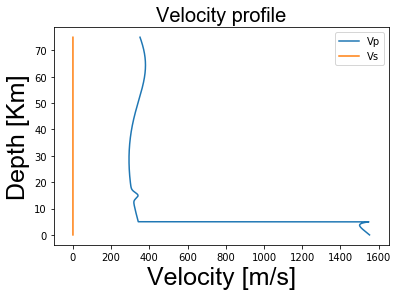

SOLVING ONLY FOR ACOUSTIC MEDIUM
Get Green's
Go to range
16.41123104095459
directory exist. removing and recreating
1.116186 338.16928
1000.0 1512.9825


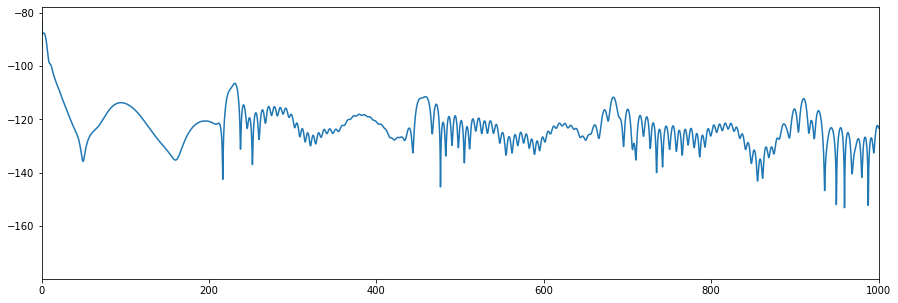

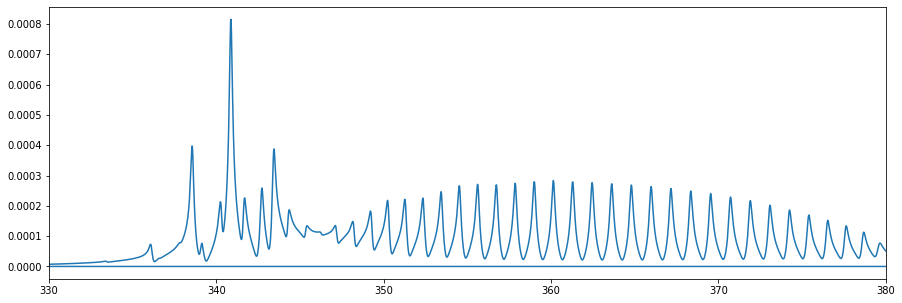

In [5]:
FFP('input-parameters')